In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import warnings



In [3]:
airport_csv = ("Data/final_dataset.csv")
airport_data_df = pd.read_csv(airport_csv)
airport_data_df.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0


In [4]:
col_list = ["air_carrier_delay","weather_delay","national_aviation_system_delay",
            "sercurity_delay","aircraft_arriving_late","flight_cancelled","flight_diverted"]


airport_data_df['delay_sum'] = airport_data_df[col_list].sum(axis=1)
airport_data_df.head()

,year,month,carrier_name,airport_abbr,airport_name,city,state,total_number_flights,air_carrier_delay,weather_delay,national_aviation_system_delay,sercurity_delay,aircraft_arriving_late,flight_cancelled,flight_diverted,delay_sum
0,2018,September,Frontier Airlines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,8.0,0.85,0.00,0.49,0.0,1.65,0.0,0.0,2.99
1,2018,September,Envoy Air,PBI,Palm Beach International Airport,West Palm Beach,FL,25.0,0.00,0.00,2.00,0.0,1.00,0.0,0.0,3.00
2,2018,September,United Air Lines Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,114.0,6.97,0.01,7.65,0.0,5.37,0.0,0.0,20.00
3,2018,September,Southwest Airlines Co.,PBI,Palm Beach International Airport,West Palm Beach,FL,143.0,8.14,0.00,1.49,0.0,15.36,0.0,1.0,25.99
4,2018,September,Endeavor Air Inc.,PBI,Palm Beach International Airport,West Palm Beach,FL,3.0,0.68,0.00,0.32,0.0,0.00,0.0,0.0,1.00


In [5]:
airport_groups = airport_data_df.groupby(['airport_name'])['delay_sum']
airport_delays = airport_groups.sum()

airport_df = airport_delays.reset_index()
airport_df.head()

,airport_name,delay_sum
0,Aberdeen Regional Airport,112.01
1,Abilene Regional Airport,498.96
2,Abraham Lincoln Capital Airport,464.05
3,Adak Airport,16.00
4,Akron-Canton Airport,2054.05


In [6]:
sorted_airport_df = airport_df.sort_values('delay_sum', ascending=False)

Top25_delay_df = sorted_airport_df.nlargest(25, 'delay_sum')
Top25_delay_df.reset_index(drop=True)

,airport_name,delay_sum
0,Chicago O'hare International Airport,92928.02
1,Dallas/Fort Worth International Airport,76313.98
2,Atlanta International Airport,65842.93
3,Denver International Airport,54852.87
4,La Guardia Airport,54431.98
5,San Francisco International Airport,51288.01
6,Newark Liberty International Airport,48368.06
7,Charlotte/Douglas International Airport,46262.06
8,Los Angeles International Airport,46203.03
9,Bush Intercontinental Airport,43761.98


<IPython.core.display.Javascript object>


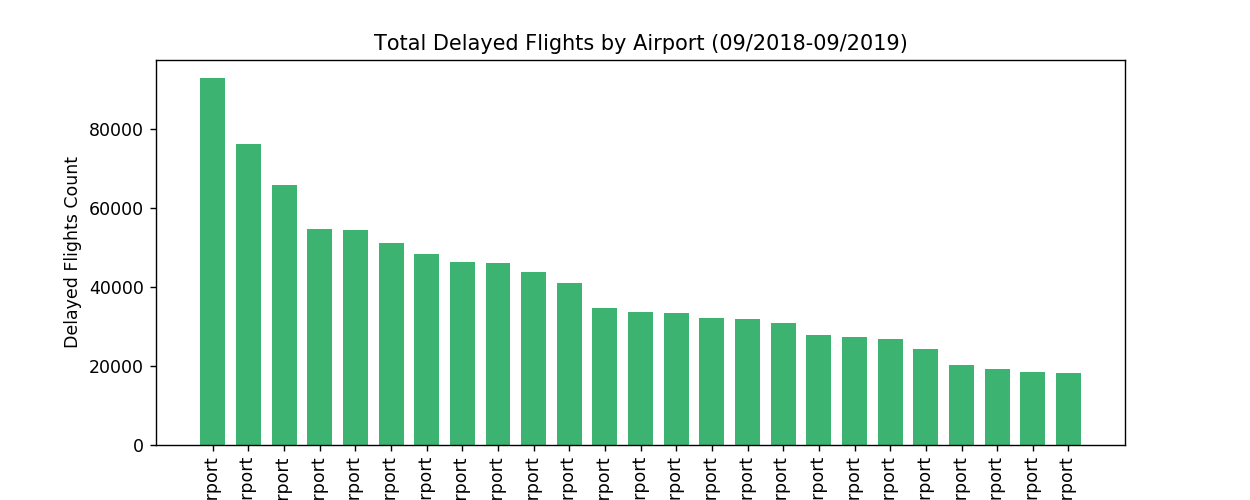

Text(0.5, 1.0, 'Total Delayed Flights by Airport (09/2018-09/2019)')

In [11]:
fig, ax = plt.subplots(figsize=(10,4))

x_axis = Top25_delay_df["airport_name"]
y_axis = Top25_delay_df["delay_sum"]

plt.bar(x_axis, y_axis,color="mediumseagreen", align="center", width=.7)
#plt.plot(x_axis, y_axis,'-o',color="orange")
plt.xticks(rotation=90)

ax.set_ylabel('Delayed Flights Count')
ax.set_title('Total Delayed Flights by Airport (09/2018-09/2019)')

#Save fig
#plt.savefig("Project-1-FlightAnalysis/Delayed_Flights_Tot_Airport.png")

In [13]:

Top25_delay_df.reset_index(drop=True)
Top25_delay_df = Top25_delay_df.rename(columns = {'index':'airport_name'})


In [15]:
#Create sizes and labels for the pie chart
sizes
labels = ["Chicago O'hare Intl Airport","Dallas/Fort Worth Intl Airport","Atlanta Intl Airport","Denver Intnl Airport","La Guardia Airport","San Francisco Intl Airport","Newark Liberty Intl Airport","Charlotte/Douglas Intl Airport","Los Angeles Intnl Airport","Bush Airport","Boston Logan Intl Airport","Phoenix Sky Harbor Intl Airport","Orlando Intl Airport","Mccarran Intl Airport","Seattle/Tacoma Intl Airport","Ronald Reagan Airport","John F. Kennedy Airport","Minneapolis/St. Paul Intl Airport","Detroit Metro Airport","Philadelphia Intl Airport","Fort Lauderdale Hollywood Intl Airport","Baltimore/Washington Intl Airport","San Diego Intl Airport","Miami Intl Airport","Chicago Midway Airport"]
colors = ["red", "lightskyblue", "lightcoral", "orange", "violet", "g", "gold", "darkorchid", "plum", "mediumseagreen", "silver", "cornflowerblue", "sandybrown", "firebrick", "lemonchiffon", "khaki", "lime", "tomato", "dodgerblue", "magenta", "slateblue", "yellow", "peachpuff", "chocolate", "navy"]
explode = [0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Piechart of delay types
plt.pie(sizes, colors=colors, labels=labels, explode=explode, autopct="%1.1f%%", shadow = True,
        radius = 3.65, startangle = 90, pctdistance = 0.6)

NameError: name 'sizes' is not defined